In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [2]:
house_dataset = pd.read_csv(
    "../Data+Viz+with+Matplotlib+&+Seaborn/Data Viz with Matplotlib & Seaborn/Data/housing_data.csv",
    parse_dates = ["period_begin", "period_end"],
    dtype = {"total_house_sold" : "Int32", "region_name": "category"}
)

In [3]:
house_dataset.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,NaN,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325.0,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577.0,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22.0,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12.0,54.0,55.0,151.2,158062.5,38.300000


In [4]:
house_data_ca = house_dataset.loc[house_dataset["region_name"].str.contains("CA")]

In [5]:
house_data_ca.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107.0,1729.0,2206.0,27.5,445540.9,5.235794
164,"Nevada County, CA",2018-09-03,2018-11-25,529.0,480.0,517.0,71.4,557508.3,12.165607
252,"Stanislaus County, CA",2017-06-05,2017-08-27,1572.0,1042.0,1193.0,38.8,320660.0,9.212632
293,"Tehama County, CA",2020-01-20,2020-04-12,102.0,241.0,252.0,99.2,297979.1,31.530228
304,"Stanislaus County, CA",2017-11-13,2018-02-04,1200.0,797.0,907.0,56.5,330049.9,9.744362


In [6]:
house_data_ca = house_data_ca.assign(region_name = house_data_ca["region_name"].str[0:-11])

In [7]:
house_data_ca.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107.0,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529.0,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572.0,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102.0,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200.0,797.0,907.0,56.5,330049.9,9.744362


In [8]:
house_ca_pivot = house_data_ca.pivot_table(
    index = ["period_begin"],
    columns = ["region_name"],
    values = "median_active_list_price"
).assign(average = lambda x : x.mean(axis = 1))

In [9]:
house_ca_pivot.head()

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,730602.5,317541.6,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3,492258.437736
2017-01-09,736230.0,324125.0,408566.4,292348.2,517645.8,340291.6,610701.2,563658.3,253016.6,237145.8,...,301900.0,264609.3,243979.1,368312.5,227729.1,449816.6,662463.1,449942.5,336129.1,493710.639623
2017-01-16,742021.6,330708.3,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0,495369.416981
2017-01-23,748271.7,341458.3,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8,497191.662264
2017-01-30,753938.4,355541.6,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6,499286.207547


In [10]:
some_house_data = house_ca_pivot.loc[: , ["San Francisco", "Los Angeles"]]

In [11]:
some_house_data.head()

region_name,San Francisco,Los Angeles
period_begin,,
2017-01-02,1229018.7,611561.0
2017-01-09,1233393.7,614061.0
2017-01-16,1239977.0,617311.0
2017-01-23,1247977.0,620644.3
2017-01-30,1253310.4,624541.6


In [12]:
print(datetime.datetime(2019, 5, 8) -  datetime.datetime(1970, 1, 1))
print(datetime.datetime(2019, 7, 29) -  datetime.datetime(1970, 1, 1))
print(datetime.datetime(2020, 3, 15) -  datetime.datetime(1970, 1, 1))

18024 days, 0:00:00
18106 days, 0:00:00
18336 days, 0:00:00


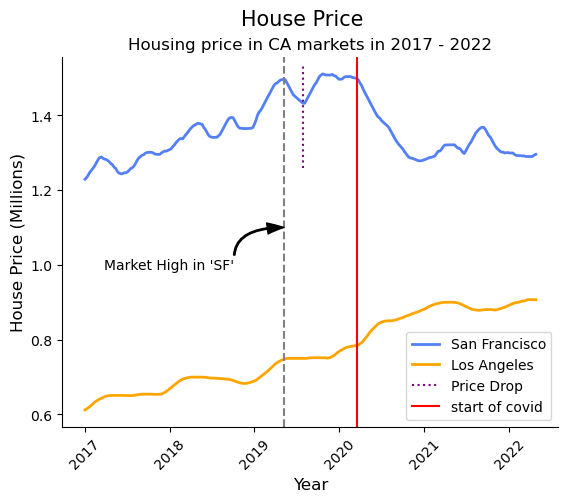

In [14]:
fig, ax = plt.subplots()
ax.plot(some_house_data.index,
        some_house_data["San Francisco"]/1000000,
       label = "San Francisco",
        color = "#5480f7",
        ls = "solid",
        linewidth = 2
       )
ax.plot(some_house_data.index,
        some_house_data["Los Angeles"]/1000000,
        label = "Los Angeles",
        color = "orange",
        linewidth = 2
       )

fig.suptitle("House Price", fontsize = 15)
ax.set_title("Housing price in CA markets in 2017 - 2022", fontsize = 12)

ax.set_ylabel("House Price (Millions)", fontsize = 12)
ax.set_xlabel("Year", fontsize = 12)

plt.xticks(rotation = 45)

ax.axvline(18024, c = "grey", ls = "--")
ax.annotate(
    "Market High in 'SF'",
    xy = (18024, 1.1),
    xytext = (17250, 1),
    arrowprops = dict(
        facecolor = "black",
        width = 1,
        headwidth = 8,
        connectionstyle = "angle3, angleA=270, angleB = 0"
    ),
    verticalalignment = "center"
)

ax.axvline(18106, c = "purple", ls = "dotted", ymin = 0.7, ymax = 0.98, label = "Price Drop")
ax.axvline(18336, c = "red", ls = "solid", label = "start of covid")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(loc = "lower right")

plt.show()

In [26]:
some_house_data["San Francisco"].describe()

count    2.780000e+02
mean     1.358263e+06
std      7.854836e+04
min      1.229019e+06
25%      1.295760e+06
50%      1.341167e+06
75%      1.413205e+06
max      1.511042e+06
Name: San Francisco, dtype: float64

In [28]:
some_house_data["Los Angeles"].describe()

count       278.000000
mean     768225.312230
std       94515.043439
min      611561.000000
25%      688714.175000
50%      750654.100000
75%      878343.750000
max      906786.500000
Name: Los Angeles, dtype: float64